** Note :

   Efficient frontier: https://en.wikipedia.org/wiki/Efficient_frontier
    
   Modern portfolio theory:_ https://en.wikipedia.org/wiki/Modern_portfolio_theory

In [182]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.style.use('fivethirtyeight')
import pandas as pd

In [183]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

In [184]:
from pandas_datareader import data as pdr
from tqdm import tqdm,trange
stock_list = ['ADVANC','AOT','AWC','BANPU','BBL','BDMS','BEM','BGRIM','BH','BJC','BTS','CBG','CPALL','CPF','CPN','CRC','DELTA','DTAC','EA','EGCO','GLOBAL','GPSC','GULF','HMPRO','INTUCH','IRPC','IVL','KBANK','KTB','KTC','LH','MINT','MTC','OSP','PTT','PTTEP','PTTGC','RATCH','SAWAD','SCB','SCC','TCAP','TISCO','TMB','TOA','TOP','TRUE','TU','VGI','WHA']
stock_data = []
stock_name = []
for quote in tqdm(stock_list):
    try:
        stock_data.append(pdr.get_data_yahoo(f'{quote}.BK', start='2014-01-01', end='2020-4-30'))
        stock_name.append(quote)
    except:
        print("Error:", sys.exc_info()[0])
        print("Description:", sys.exc_info()[1])

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [01:59<00:00,  2.39s/it]


In [185]:
print(stock_name)

['ADVANC', 'AOT', 'AWC', 'BANPU', 'BBL', 'BDMS', 'BEM', 'BGRIM', 'BH', 'BJC', 'BTS', 'CBG', 'CPALL', 'CPF', 'CPN', 'CRC', 'DELTA', 'DTAC', 'EA', 'EGCO', 'GLOBAL', 'GPSC', 'GULF', 'HMPRO', 'INTUCH', 'IRPC', 'IVL', 'KBANK', 'KTB', 'KTC', 'LH', 'MINT', 'MTC', 'OSP', 'PTT', 'PTTEP', 'PTTGC', 'RATCH', 'SAWAD', 'SCB', 'SCC', 'TCAP', 'TISCO', 'TMB', 'TOA', 'TOP', 'TRUE', 'TU', 'VGI', 'WHA']


In [186]:
ADVANC = stock_data[0]
AOT = stock_data[1]
AWC = stock_data[2]
BANPU = stock_data[3]
BBL = stock_data[4]
BDMS = stock_data[5]
BEM = stock_data[6]
BGRIM = stock_data[7]
BH = stock_data[8]
BJC = stock_data[9]
BTS = stock_data[10]
CBG= stock_data[11]
CPALL= stock_data[12]
CPF = stock_data[13]
CPN = stock_data[14]
CRC = stock_data[15]
DELTA = stock_data[16]
DTAC = stock_data[17]
EA = stock_data[18]
EGCO = stock_data[19]
GLOBAL = stock_data[20]
GPSC = stock_data[21]
GULF = stock_data[22]
HMPRO = stock_data[23]
INTUCH = stock_data[24]
IRPC = stock_data[25]
IVL = stock_data[26]
KBANK = stock_data[27]
KTB = stock_data[28]
KTC = stock_data[29]
LH = stock_data[30]
MINT = stock_data[31]
MTC = stock_data[32]
OSP = stock_data[33]
PTT = stock_data[34]
PTTEP = stock_data[35]
PTTGC = stock_data[36]
RATCH = stock_data[37]
SAWAD = stock_data[38]
SCB = stock_data[39]
SCC = stock_data[40]
TCAP = stock_data[41]
TISCO = stock_data[42]
TMB = stock_data[43]
TOA = stock_data[44]
TOP = stock_data[45]
TRUE = stock_data[46]
TU = stock_data[47]
VGI = stock_data[48]
WHA = stock_data[49]

In [188]:
BAY.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,30.25,29.75,29.75,29.75,1894300.0,24.682831
2014-01-03,30.25,29.75,30.00,29.75,1533500.0,24.682831
2014-01-06,30.00,29.75,30.00,30.00,1522700.0,24.890251
2014-01-07,30.50,30.00,30.00,30.00,3043500.0,24.890251
2014-01-08,30.25,30.00,30.00,30.00,2235900.0,24.890251


In [189]:
stock = pd.concat([ADVANC['Adj Close'], AOT['Adj Close'], AWC['Adj Close'], BANPU['Adj Close'], BBL['Adj Close'], BDMS['Adj Close'], BEM['Adj Close'], BGRIM['Adj Close'], BH['Adj Close'], BJC['Adj Close'], BTS['Adj Close'], CBG['Adj Close'], CPALL['Adj Close'], CPF['Adj Close'], CPN['Adj Close'], CRC['Adj Close'], DELTA['Adj Close'], DTAC['Adj Close'], EA['Adj Close'], EGCO['Adj Close'], GLOBAL['Adj Close'], GPSC['Adj Close'], GULF['Adj Close'], HMPRO['Adj Close'], INTUCH['Adj Close'], IRPC['Adj Close'], IVL['Adj Close'], KBANK['Adj Close'], KTB['Adj Close'], KTC['Adj Close'], LH['Adj Close'], MINT['Adj Close'], MTC['Adj Close'], OSP['Adj Close'], PTT['Adj Close'], PTTEP['Adj Close'], PTTGC['Adj Close'], RATCH['Adj Close'], SAWAD['Adj Close'], SCB['Adj Close'], SCC['Adj Close'], TCAP['Adj Close'], TISCO['Adj Close'], TMB['Adj Close'], TOA['Adj Close'], TOP['Adj Close'], TRUE['Adj Close'], TU['Adj Close'], VGI['Adj Close'], WHA['Adj Close']], axis = 1)
stock.columns = stock_name
stock.head(1)

,ADVANC,AOT,AWC,BANPU,BBL,BDMS,BEM,BGRIM,BH,BJC,BTS,CBG,CPALL,CPF,CPN,CRC,DELTA,DTAC,EA,EGCO,GLOBAL,GPSC,GULF,HMPRO,INTUCH,IRPC,IVL,KBANK,KTB,KTC,LH,MINT,MTC,OSP,PTT,PTTEP,PTTGC,RATCH,SAWAD,SCB,SCC,TCAP,TISCO,TMB,TOA,TOP,TRUE,TU,VGI,WHA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01-02,137.609299,8.198195,NaN,14.158555,128.947006,8.484464,2.074116,NaN,73.877037,38.513458,5.908451,NaN,34.314228,24.542395,32.769962,NaN,41.095432,74.795456,7.208878,97.791489,8.150421,NaN,NaN,5.299478,44.559124,2.397686,16.787935,122.954483,10.5922,0.245248,4.510472,15.843559,NaN,NaN,3.416557,117.733658,57.112919,35.138138,NaN,98.861626,303.841095,19.418337,23.958836,1.450153,NaN,41.190784,5.591828,13.013213,4.249725,1.196419


In [190]:
log_ret = np.log(stock/stock.shift(1))

In [191]:
log_ret.head(5)

,ADVANC,AOT,AWC,BANPU,BBL,BDMS,BEM,BGRIM,BH,BJC,BTS,CBG,CPALL,CPF,CPN,CRC,DELTA,DTAC,EA,EGCO,GLOBAL,GPSC,GULF,HMPRO,INTUCH,IRPC,IVL,KBANK,KTB,KTC,LH,MINT,MTC,OSP,PTT,PTTEP,PTTGC,RATCH,SAWAD,SCB,SCC,TCAP,TISCO,TMB,TOA,TOP,TRUE,TU,VGI,WHA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,0.047006,-0.010292,NaN,-0.055056,0.014948,-0.004598,-0.032092,NaN,0.017805,-0.027279,-0.030962,NaN,0.000000,0.000000,-0.013423,NaN,-0.042966,-0.005391,-0.006734,0.008230,-0.020761,NaN,NaN,-0.029676,0.023167,-0.006515,-0.005115,0.037104,0.006431,0.018692,-0.011976,-0.015914,NaN,NaN,-0.022141,-0.012987,-0.032897,0.005391,NaN,0.007576,-0.002628,0.008097,0.013514,-0.010357,NaN,-0.071974,-0.014814,-0.032671,-0.048527,-0.061873
2014-01-06,0.025190,-0.017392,NaN,-0.048321,0.029242,0.092373,-0.021978,NaN,-0.011835,-0.033802,-0.006309,NaN,0.006231,-0.041847,0.013423,NaN,-0.039806,0.029296,-0.013606,-0.012371,0.041101,NaN,NaN,-0.006043,0.007605,-0.006558,0.005115,0.038966,0.012739,-0.009302,0.006005,0.072195,NaN,NaN,-0.015038,-0.033226,-0.003350,0.005362,NaN,0.055060,0.013072,0.023906,0.006689,0.025706,NaN,0.004963,0.029414,-0.041437,-0.056833,-0.039054
2014-01-07,0.043803,0.061244,NaN,0.029271,0.025606,-0.012685,0.032793,NaN,-0.008969,0.022579,0.031155,NaN,0.018462,0.041847,0.039221,NaN,0.020101,0.010444,0.020340,0.000000,0.058649,NaN,NaN,0.023955,0.026169,0.038715,0.035092,0.031350,0.025001,0.054559,0.029502,0.043804,NaN,NaN,0.062406,0.036488,0.013334,0.010638,NaN,0.028171,0.010336,0.015625,0.026317,0.010101,NaN,0.043590,0.028573,0.003839,0.056833,0.017544
2014-01-08,-0.019231,-0.043852,NaN,0.019050,-0.002813,-0.025863,-0.010815,NaN,-0.015129,-0.011101,-0.012346,NaN,-0.012270,-0.024898,-0.006431,NaN,0.004963,0.018019,0.000000,0.012371,-0.032156,NaN,NaN,-0.017912,-0.003697,-0.019170,0.033901,0.000000,-0.025001,-0.026908,-0.023531,-0.033904,NaN,NaN,0.014135,0.019356,0.032576,0.010526,NaN,-0.024606,0.007683,-0.007782,-0.019673,0.014960,NaN,0.004728,-0.043173,-0.007692,0.027250,0.004338


In [192]:
np.random.seed(1000)
num_port = 100000
all_weight = np.zeros((num_port, len(stock.columns)))
ret_arr = np.zeros(num_port)
vol_arr = np.zeros(num_port)
sharpe_arr = np.zeros(num_port)

for x in range(num_port):
    # Weights
    weight = np.array(np.random.random(50))
    weight = weight/np.sum(weight)
    
    # Save weights
    all_weight[x,:] = weight
    
    # Expected return
    ret_arr[x] = np.sum( (log_ret.mean() * weight*252)) # Why do we multiply by 252 ? It is Annualized return.
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weight.T, np.dot(log_ret.cov()*252, weight))) # Annualized volatility
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

In [193]:
print('Max sharpe ratio in array:{}'.format(sharpe_arr.max()))
print("It is a location in thr array:{}".format(sharpe_arr.argmax()))

Max sharpe ratio in array:0.7997657598888931
It is a location in thr array:31098


In [194]:
pd.DataFrame(all_weight[sharpe_arr.argmax(),:].reshape(1, 50)*100, columns = stock_name)

,ADVANC,AOT,AWC,BANPU,BBL,BDMS,BEM,BGRIM,BH,BJC,BTS,CBG,CPALL,CPF,CPN,CRC,DELTA,DTAC,EA,EGCO,GLOBAL,GPSC,GULF,HMPRO,INTUCH,IRPC,IVL,KBANK,KTB,KTC,LH,MINT,MTC,OSP,PTT,PTTEP,PTTGC,RATCH,SAWAD,SCB,SCC,TCAP,TISCO,TMB,TOA,TOP,TRUE,TU,VGI,WHA
0,3.601762,4.031276,0.255675,0.969362,2.70006,3.448349,2.102457,1.056651,2.607271,4.024207,1.483299,3.538959,3.493712,2.942215,1.129841,0.303807,1.318402,0.14971,4.139085,4.165765,1.255617,0.675158,1.766808,4.247997,1.59341,2.006198,2.608705,0.04086,2.196283,3.209119,1.930525,0.711721,1.899745,3.565843,4.170806,0.950129,0.620609,1.161577,3.478383,1.056427,0.761427,0.569457,2.716615,0.015632,0.427596,2.43883,1.9737,3.841659,0.524157,0.123145


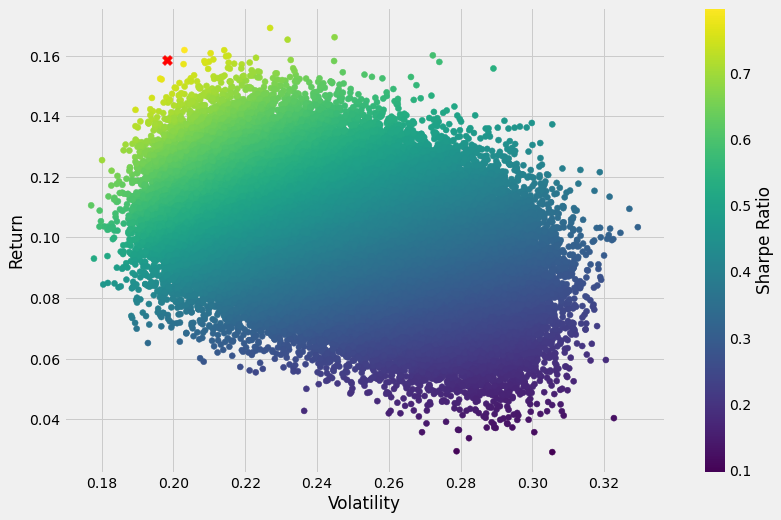

In [195]:
#max of mean and sd
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]

plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=100, marker = 'X') # red dot
plt.show()

Optimization

In [196]:
def get_ret_vol_sr(weight):
    weight = np.array(weight)
    ret = np.sum(log_ret.mean() * weight) * 252
    vol = np.sqrt(np.dot(weight.T, np.dot(log_ret.cov()*252, weight)))
    sr = ret/vol
    return np.array([ret, vol, sr])

def neg_sharpe(weight):
# the number 2 is the sharpe ratio index from the get_ret_vol_sr
    return get_ret_vol_sr(weight)[2] * -1

def check_sum(weight):
    #return 0 if sum of the weights is 1
    return np.sum(weight)-1

In [197]:
cons = ({'type':'eq', 'fun':check_sum})
bounds = ((0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1))
init_guess = [0.02]*50

In [198]:
from scipy.optimize import minimize
opt_results = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints = cons)

In [199]:
print(opt_results)

     fun: -1.6908116083934568
     jac: array([ 3.06968883e-01,  3.71575356e-04,  7.41595921e+00,  1.67289540e+00,
        7.62392998e-01,  1.49503201e-02, -6.30661845e-04,  4.37495559e-02,
        1.72809273e-01,  7.68139780e-01,  2.54906014e-01,  3.40079889e-01,
        7.71437287e-02,  7.14356929e-01,  7.09826678e-01,  1.80498773e+01,
        6.15427524e-01,  1.06623675e+00,  9.25958157e-05, -1.97380781e-04,
        5.65251023e-01,  5.02174944e-02, -1.72212720e-03,  2.31277689e-01,
        4.59489480e-01,  8.18045601e-01,  9.81387928e-01,  1.08487242e+00,
        7.79866710e-01,  7.59080052e-04,  4.96614158e-01,  8.00040603e-01,
        1.28280088e-01,  1.12110269e+00, -1.33889914e-03,  1.55023110e+00,
        1.44356912e+00,  1.16992295e-01,  4.99114394e-04,  1.05072702e+00,
        6.22948796e-01,  2.64366090e-01,  5.59136271e-04,  1.17569695e+00,
        6.83222726e-01,  1.01385301e+00,  1.23321109e+00,  3.84429485e-01,
        4.84160900e-01,  4.86159757e-01])
 message: 'Optimiz

In [210]:
pd.DataFrame(opt_results.x.reshape(1, 50)*100, columns = stock_name)

,ADVANC,AOT,AWC,BANPU,BBL,BDMS,BEM,BGRIM,BH,BJC,BTS,CBG,CPALL,CPF,CPN,CRC,DELTA,DTAC,EA,EGCO,GLOBAL,GPSC,GULF,HMPRO,INTUCH,IRPC,IVL,KBANK,KTB,KTC,LH,MINT,MTC,OSP,PTT,PTTEP,PTTGC,RATCH,SAWAD,SCB,SCC,TCAP,TISCO,TMB,TOA,TOP,TRUE,TU,VGI,WHA
0,6.068430e-12,32.270929,0.0,0.0,4.436851e-12,7.051263e-12,7.869345,0.0,6.177095e-12,4.450071e-12,6.241779e-12,5.275362e-12,6.941800e-12,4.489234e-12,4.414005e-12,0.0,4.787072e-12,2.187518e-12,3.753708,4.951308,5.168207e-12,6.648844e-12,1.752083,5.765125e-12,5.500151e-12,3.774884e-12,2.537542e-12,2.889283e-12,4.267109e-12,21.7358,5.156661e-12,3.554828e-12,6.140545e-12,9.128919e-13,18.639857,3.673906e-13,1.158509e-12,6.653440e-12,1.690924,3.290888e-12,4.829447e-12,5.604093e-12,7.336045,2.747544e-12,4.336317e-12,3.125482e-12,2.292972e-12,6.212997e-12,5.283728e-12,4.542156e-12


In [211]:
get_ret_vol_sr(opt_results.x)

array([0.42012941, 0.24847796, 1.69081161])

In [200]:
np.exp(get_ret_vol_sr(opt_results.x))-1

array([0.52215853, 0.28207256, 4.42388099])

In [201]:
frontier_y = np.linspace(0,max_sr_ret,200) 

In [202]:
def minimize_volatility(weight):
    return get_ret_vol_sr(weight)[1]

Let $\mathbb{N}$ be a set of all stock asset which include in SET50. Let $\sigma_{i,j}$ be the (sample) covariance of the periodic  log returns on the two abitary assets $i,j \in \mathbb{N}$ in portfolios and $\mu_{i}$ be an average of the log return on asset $i \in \mathbb{N}$

$
\begin{array}
\displaystyle \min_{(w_1,w_2 ,\dots, w_{50}) \in (0,1)^{50}} \sum_{i,j } w_i w_j \sigma_{i,j}\\
\textrm{s.t.} & \sum_{i = 1}^{50} w_i \mu_i  = \text{fix possible return}\\
&\sum_{i = 1}^{50} w_i =  1  \\
\end{array}
$

In [203]:
frontier_x = []
statergy = []

for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP', bounds=bounds, constraints=cons)
    statergy.append(result.x)
    frontier_x.append(result['fun'])
    

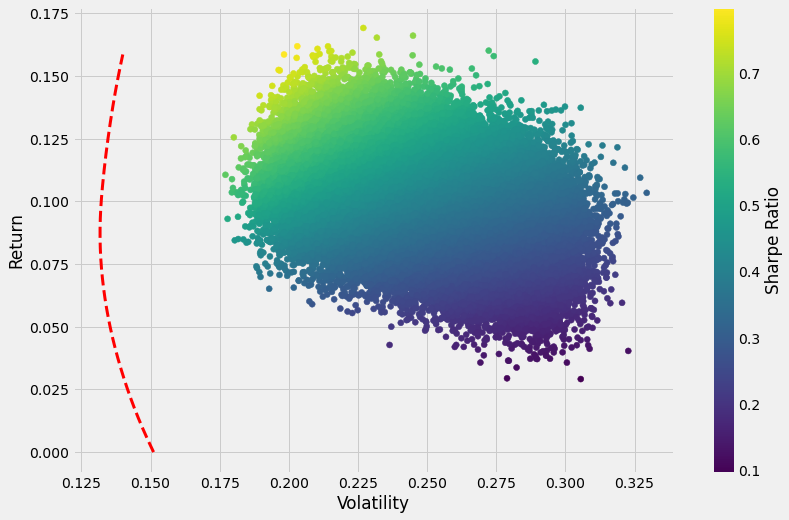

In [204]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(frontier_x,frontier_y, 'r--', linewidth=3)
plt.savefig('cover.png')
plt.show()

In [231]:
statergy_frame = pd.DataFrame(data=statergy, columns=stock_name)

In [232]:

statergy_frame['Optimize Log Volatirity'] = frontier_x
statergy_frame['Log Expected Return Need'] = frontier_y
statergy_frame['OptimizeVolatirity'] = np.exp(statergy_frame['Optimize Log Volatirity'])-1
statergy_frame['Expected Return Need'] = np.exp(statergy_frame['Log Expected Return Need'])-1

In [233]:
statergy_frame[stock_name] = statergy_frame[stock_name]*100

In [234]:
statergy_frame

,ADVANC,AOT,AWC,BANPU,BBL,BDMS,BEM,BGRIM,BH,BJC,BTS,CBG,CPALL,CPF,CPN,CRC,DELTA,DTAC,EA,EGCO,GLOBAL,GPSC,GULF,HMPRO,INTUCH,IRPC,IVL,KBANK,KTB,KTC,LH,MINT,MTC,OSP,PTT,PTTEP,PTTGC,RATCH,SAWAD,SCB,SCC,TCAP,TISCO,TMB,TOA,TOP,TRUE,TU,VGI,WHA,Optimize Log Volatirity,Log Expected Return Need,OptimizeVolatirity,Expected Return Need
0,0.136274,5.689351e-15,2.858174e-13,5.485761e+00,2.679460e+01,4.875386e-14,2.340250e-14,3.391926e-14,3.499525,2.970453e+00,0.000000e+00,3.087266e-15,5.442816,0.000000e+00,9.307876e-15,7.108029e-14,3.014716e+00,3.028388e+00,0.000000e+00,9.397322e-15,4.735253e-15,3.401684e-15,1.961593e-14,0.000000e+00,8.949043e+00,6.098637e-15,7.817098e-15,7.037285e-14,8.154556e-14,3.583288e-15,1.084202e-17,0.000000e+00,1.680513e-15,0.000000e+00,1.469636e-14,0.000000e+00,3.626656e-15,8.410506,0.000000e+00,3.693460e+00,1.119231e+01,2.599917e-14,1.455270e-14,7.368947e-01,5.586352e-15,9.261797e-15,9.233445e-01,15.721914,4.133521e-15,0.000000e+00,0.151073,0.000000,0.163082,0.000000
1,0.412022,0.000000e+00,0.000000e+00,5.411560e+00,2.678669e+01,0.000000e+00,0.000000e+00,0.000000e+00,3.564297,2.983490e+00,0.000000e+00,0.000000e+00,5.575573,0.000000e+00,0.000000e+00,0.000000e+00,3.012087e+00,2.954239e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.771235e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.122326e-15,0.000000e+00,8.540273,0.000000e+00,3.558362e+00,1.117491e+01,0.000000e+00,0.000000e+00,6.775520e-01,0.000000e+00,0.000000e+00,8.614718e-01,15.716244,0.000000e+00,0.000000e+00,0.150726,0.000797,0.162678,0.000797
2,0.526621,1.362571e-14,0.000000e+00,5.316208e+00,2.670895e+01,8.169192e-14,0.000000e+00,3.876023e-15,3.604270,2.974634e+00,2.048600e-14,0.000000e+00,5.741107,1.400301e-13,8.375462e-16,2.536166e-13,3.003084e+00,2.887486e+00,3.538023e-14,0.000000e+00,3.881444e-15,7.800835e-15,3.181049e-14,4.827410e-15,8.743202e+00,0.000000e+00,0.000000e+00,1.129305e-13,1.522654e-13,2.740863e-14,1.972706e-14,0.000000e+00,4.122679e-15,5.914323e-14,7.380706e-15,0.000000e+00,0.000000e+00,8.705676,1.589982e-14,3.473930e+00,1.118598e+01,7.331375e-14,1.691084e-14,6.369573e-01,3.801755e-14,2.916504e-15,8.154021e-01,15.676502,7.920097e-15,3.865723e-14,0.150380,0.001593,0.162276,0.001595
3,0.638788,3.636143e-14,4.348030e-13,5.220348e+00,2.663091e+01,2.325343e-14,3.522844e-14,3.835094e-14,3.644160,2.965267e+00,1.188015e-14,2.042637e-14,5.907336,8.122030e-14,2.330493e-14,1.065933e-13,2.994068e+00,2.820995e+00,1.853715e-14,3.661893e-15,9.150666e-15,2.850910e-14,0.000000e+00,1.925001e-14,8.717437e+00,1.497012e-14,2.155123e-14,2.035291e-13,1.590714e-13,4.176076e-14,4.808166e-14,1.412173e-14,2.503965e-14,6.829932e-14,3.349372e-14,3.358316e-15,6.001059e-15,8.871263,1.956172e-14,3.389753e+00,1.119716e+01,3.577867e-14,1.816310e-14,5.969608e-01,3.808260e-15,8.364620e-15,7.695390e-01,15.636019,1.674008e-14,0.000000e+00,0.150038,0.002390,0.161878,0.002393
4,0.748966,0.000000e+00,0.000000e+00,5.123948e+00,2.655293e+01,0.000000e+00,2.360850e-15,6.432029e-15,3.684454,2.955397e+00,0.000000e+00,0.000000e+00,6.074028,7.240031e-14,8.367330e-15,7.953707e-14,2.985071e+00,2.754780e+00,5.225854e-15,9.324139e-16,2.397442e-14,1.395639e-14,0.000000e+00,9.085614e-15,8.693262e+00,7.692414e-15,4.900594e-15,0.000000e+00,5.753861e-14,0.000000e+00,9.980081e-15,9.237403e-15,8.825406e-15,2.101184e-14,2.052395e-14,3.277001e-15,3.992575e-15,9.036849,0.000000e+00,3.305723e+00,1.120839e+01,1.058181e-14,1.788663e-14,5.576005e-01,2.748995e-14,2.892109e-15,7.237687e-01,15.594832,2.398797e-15,3.185928e-14,0.149698,0.003187,0.161484,0.003192
5,0.856983,2.242401e-14,3.315788e-13,5.026742e+00,2.647598e+01,1.566943e-13,4.857497e-14,1.191945e-13,3.725160,2.944569e+00,3.815850e-14,3.677885e-14,6.241047,2.537738e-13,2.710505e-14,4.415224e-13,2.976006e+00,2.688902e+00,4.544976e-14,3.217912e-14,1.562877e-14,3.911530e-14,4.474773e-14,1.690271e-14,8.669965e+00,2.819197e-14,3

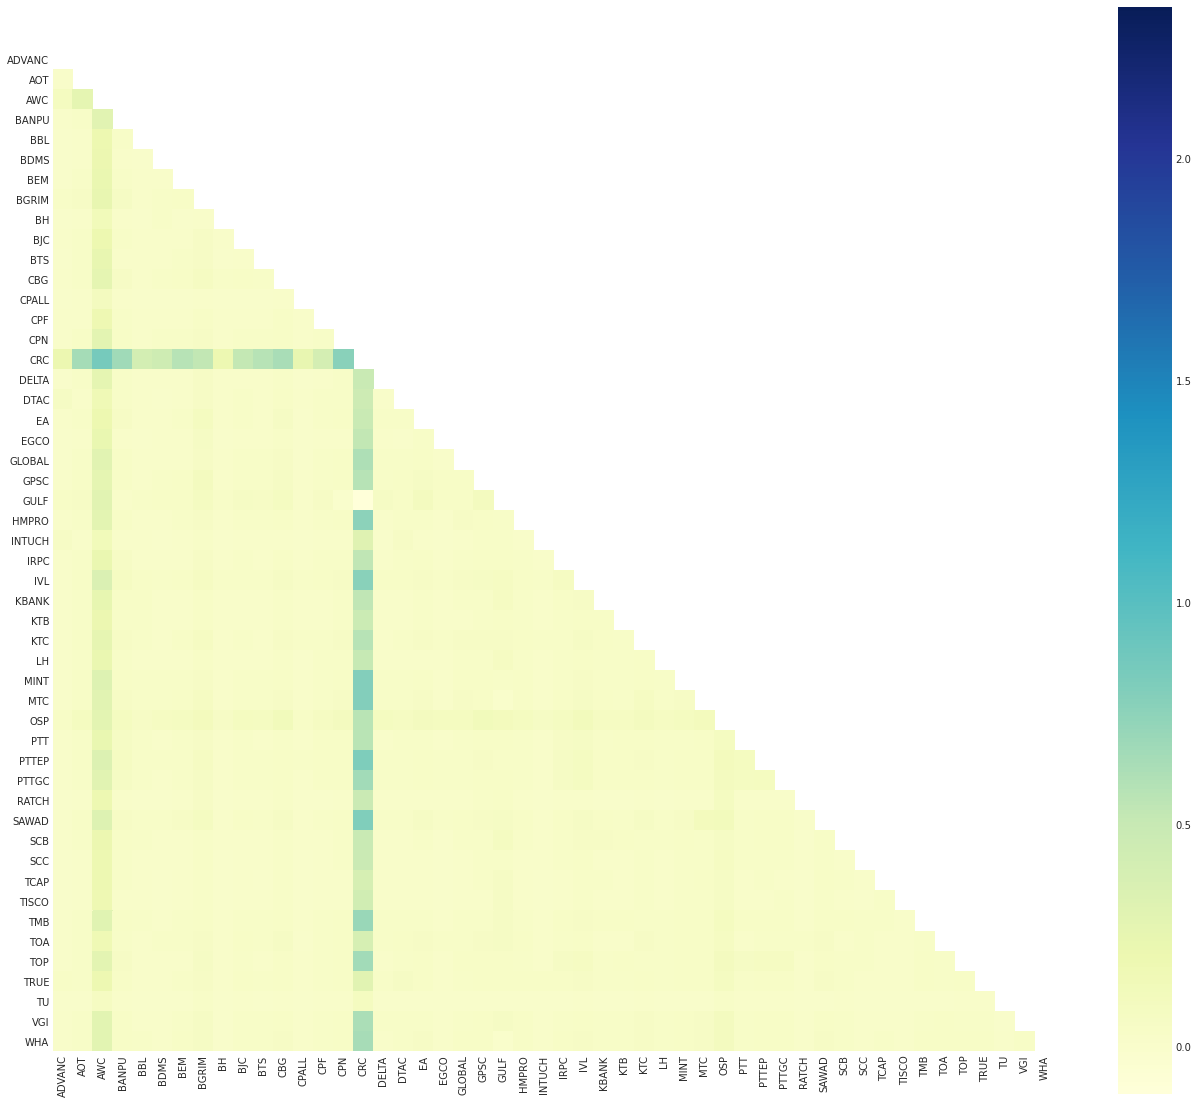

In [219]:
import seaborn as sns
%matplotlib inline

#covariant of SET50
cov_table =log_ret.cov()*255

mask = np.zeros_like(cov_table)
mask[np.triu_indices_from(mask)] = True
# plot the heatmap
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(20,20)) 
    sns.heatmap(cov_table, xticklabels=cov_table.columns, yticklabels=cov_table.columns, ax=ax, cmap="YlGnBu", mask=mask, square=True)
